<a href="https://colab.research.google.com/github/husthorng/Backpropagation_NN/blob/husthorng-patch-1/bp_surface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(2.023, 2.827, 'Max. error:1.97%')

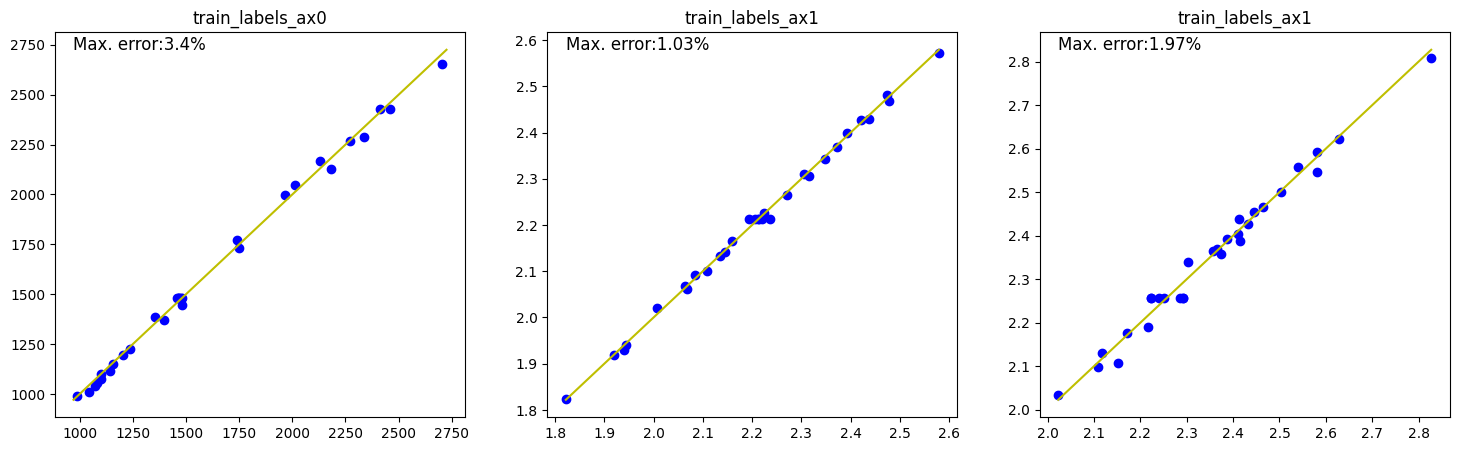

In [ ]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec


urlsyn0 = "https://raw.githubusercontent.com/husthorng/Backpropagation_NN/husthorng-patch-1/W1_wc.csv"
syn0t = pd.read_csv(urlsyn0,encoding='utf-8',header=None)
syn0t=np.array(syn0t)
W1=syn0t[1:,1:]

urlsyn1 = "https://raw.githubusercontent.com/husthorng/Backpropagation_NN/husthorng-patch-1/W2_wc.csv"
syn1t = pd.read_csv(urlsyn1,encoding='utf-8',header=None)
syn1t=np.array(syn1t)
W2=syn1t[1:,1:]
numTag=W2.shape[0]

#nOutputs=syn1.shape[1]
ur2 ="https://raw.githubusercontent.com/husthorng/Backpropagation_NN/husthorng-patch-1/max_min_Xi_wc.csv"
max_min_Xi = np.array(pd.read_csv(ur2,encoding='utf-8'))[:,1:]
max_min_T=np.append([max_min_Xi[0][4:]], [max_min_Xi[1][4:]], axis=0)

ur2 ="https://raw.githubusercontent.com/husthorng/Backpropagation_NN/husthorng-patch-1/wirecut.csv"
records = pd.read_csv(ur2,encoding='utf-8')

Xi1=records.iloc[0:records.shape[0]].values

Xi1=pd.DataFrame(Xi1)
inputD=Xi1.iloc[0:Xi1.shape[0],0:Xi1.shape[1]-numTag].values
#inputD[0] #[234.  ,   0.34, 115.  ,   0.37]
targetD=Xi1.iloc[:,list(Xi1.shape[1]-np.arange(numTag,0,-1))].values

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))


ptp_Xi=np.ptp(max_min_Xi,axis=0)

N_train_data=(inputD - max_min_Xi[1][:4])/ptp_Xi[:4]
inputD3_1=np.insert(N_train_data, 0, 1, axis=1)

N_train_labels=(targetD - max_min_Xi[1][4:])/ptp_Xi[4:]
targetD3=N_train_labels

#inputD3_1=np.array([1. , 0. , 0.5, 0.5, 0.5])

net_h=inputD3_1@W1.T
out_h=sigmoid(net_h,deriv=False)
out_H1=np.insert(out_h, 0, 1, axis=1)
net_o=out_H1@W2.T
out_o=sigmoid(net_o,deriv=False)
out_o_V=out_o*ptp_Xi[4:]+max_min_Xi[1][4:]
out_o_V

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(18)
spec = gridspec.GridSpec(ncols=3, nrows=1,
              width_ratios=[1, 1,1], wspace=0.2,
              hspace=0.5, height_ratios=[1])
ax0 = fig.add_subplot(spec[0])
ax0.plot([max_min_T[:,0][1],max_min_T[:,0][0]],[max_min_T[:,0][1],max_min_T[:,0][0]],color = "y")

ax0.scatter(targetD[:,0], out_o_V[:,0],color = "b")
ax0.set_title('train_labels_ax0')
ax0.text(max_min_T[:,0][1], max_min_T[:,0][0],'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,0])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

ax1 = fig.add_subplot(spec[1])
ax1.plot([max_min_T[:,1][1],max_min_T[:,1][0]],[max_min_T[:,1][1],max_min_T[:,1][0]],color = "y")

ax1.scatter(targetD[:,1], out_o_V[:,1],color = "b")
ax1.set_title('train_labels_ax1')
ax1.text(max_min_T[:,1][1], max_min_T[:,1][0],'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,1])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

ax1 = fig.add_subplot(spec[2])
ax1.plot([max_min_T[:,2][1],max_min_T[:,2][0]],[max_min_T[:,2][1],max_min_T[:,2][0]],color = "y")

ax1.scatter(targetD[:,2], out_o_V[:,2],color = "b")
ax1.set_title('train_labels_ax1')
ax1.text(max_min_T[:,2][1], max_min_T[:,2][0],'Max. error:'+str(round(max((abs(targetD-out_o_V)/targetD)[:,2])*100,2))+'%', fontsize=12)
#ax0.text(36, 42, r'an equation: $E=mc^2$', fontsize=15)

In [ ]:
np.transpose(inputD)

array([[ 2.        , 63.        , 69.        , 21.        ],
       [ 2.77777778, 64.33333333, 69.        , 21.        ],
       [ 3.55555556, 65.66666667, 69.        , 21.        ],
       [ 4.33333333, 67.        , 69.        , 21.        ],
       [ 5.11111111, 68.33333333, 69.        , 21.        ],
       [ 5.88888889, 69.66666667, 69.        , 21.        ],
       [ 6.66666667, 71.        , 69.        , 21.        ],
       [ 7.44444444, 72.33333333, 69.        , 21.        ],
       [ 8.22222222, 73.66666667, 69.        , 21.        ],
       [ 9.        , 75.        , 69.        , 21.        ]])

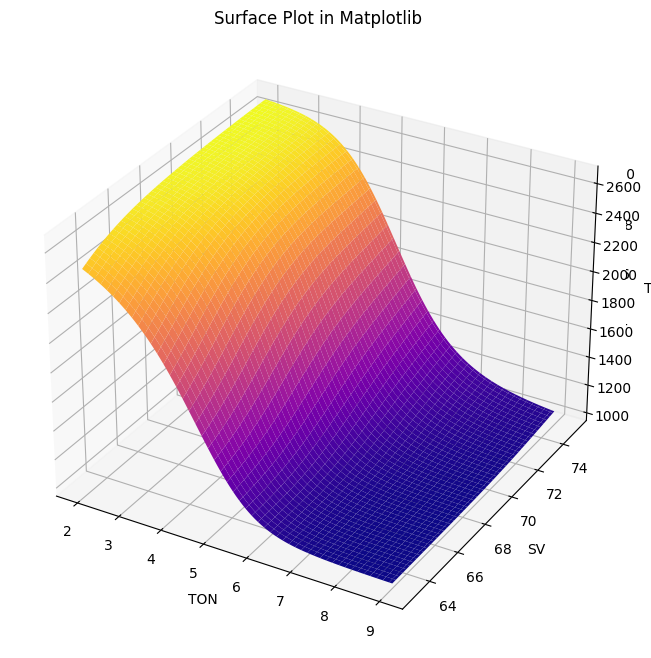

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(8, 8))
ax3d = plt.axes(projection="3d")

numdivs=100
numinput=W1.shape[1]-1
numout=W2.shape[0]
xTON = np.linspace(max_min_Xi[1][0], max_min_Xi[0][0], numdivs)
ySV = np.linspace(max_min_Xi[1][1], max_min_Xi[0][1], numdivs)
X_TON, Y_SV = np.meshgrid(xTON, ySV)
WT=np.ones((numdivs,numdivs))*6
FR=np.ones((numdivs,numdivs))*21
Z=np.zeros((numdivs,numdivs))
inpary=[]
for i in range(numdivs):
  for j in range(numdivs):
    inpary.append(list([X_TON[i][j],Y_SV[i][j],WT[i][j],FR[i][j]]))
inputD=np.array(inpary)
N_train_data=(inputD - max_min_Xi[1][:4])/ptp_Xi[:4]
inputD3_1=np.insert(N_train_data, 0, 1, axis=1)
net_h=inputD3_1@W1.T
out_h=sigmoid(net_h,deriv=False)
out_H1=np.insert(out_h, 0, 1, axis=1)
net_o=out_H1@W2.T
out_o=sigmoid(net_o,deriv=False)
out_o_V=out_o*ptp_Xi[4:]+max_min_Xi[1][4:]
Z=np.array(out_o_V[:,0]).reshape(numdivs,numdivs)

ax3d = plt.axes(projection="3d")
ax3d.plot_surface(X_TON, Y_SV, Z, cmap="plasma")
ax3d.set_title("Surface Plot in Matplotlib")
ax3d.set_xlabel("TON")
ax3d.set_ylabel("SV")
ax3d.set_zlabel("T")

plt.show()

In [ ]:
Z.shape

(100, 100)